In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-dataset-from-glassdoor/salary_data_cleaned.csv
/kaggle/input/jobs-dataset-from-glassdoor/glassdoor_jobs.csv
/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso , Ridge 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [4]:
df.isnull().sum()
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [5]:
print("\nMissing Values:\n" , df.isnull().sum())


Missing Values:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64


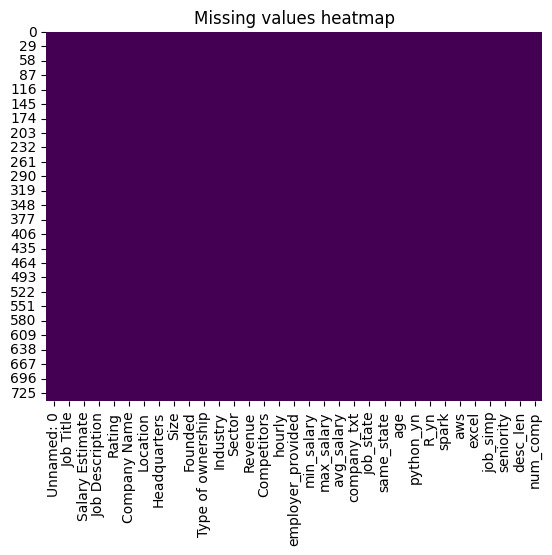

In [6]:
# cbar-> color bar
# cmap->color map
sns.heatmap(df.isnull(), cbar=False, cmap = 'viridis') #true -->missing value present, and false -->not present
plt.title("Missing values heatmap")
plt.show()

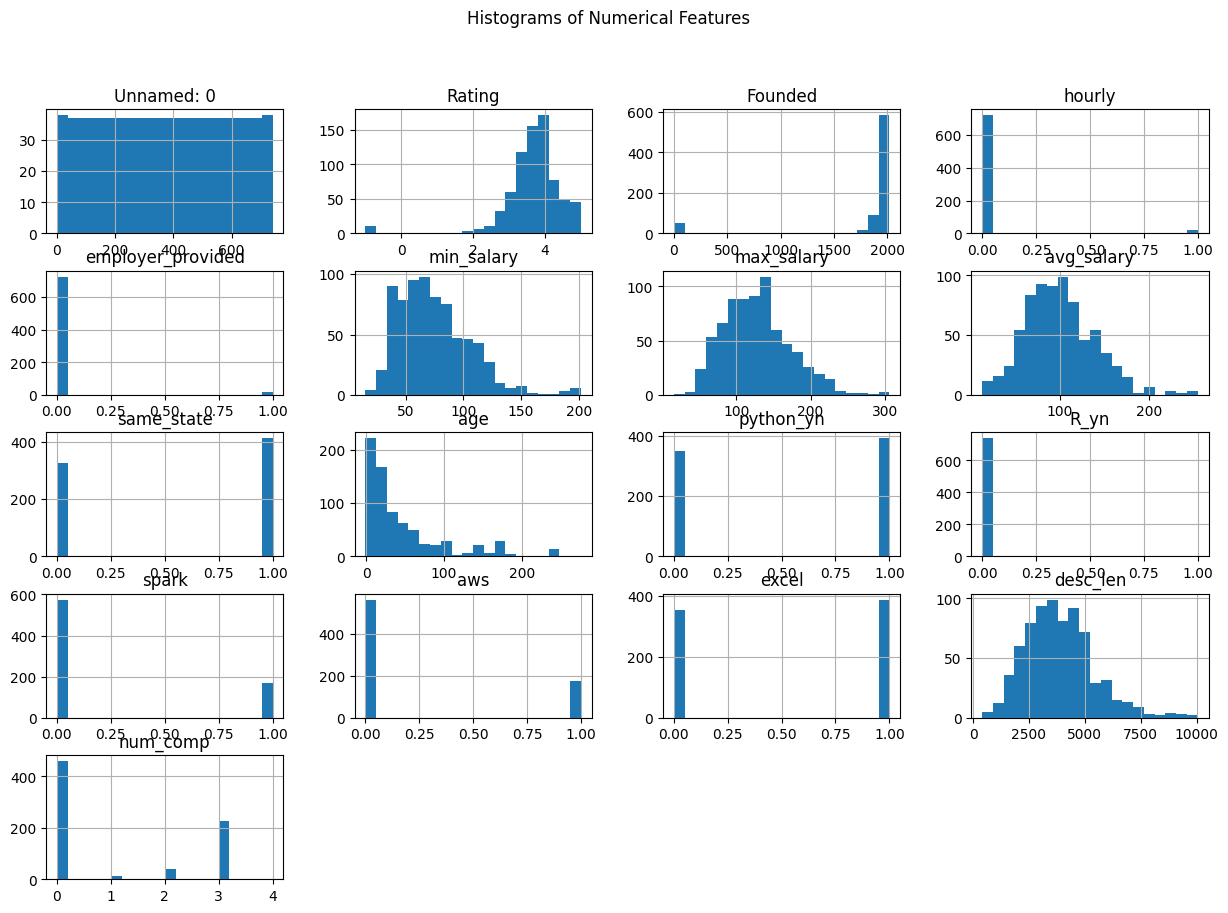

In [7]:
# histograms or nuemrical features
# df.ist() automatically ignores non numerial columns
df.hist(figsize = (15,10), bins = 20)
# sup title- > super title
# x->Data values , y-> frequency(count)
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [8]:
df['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [9]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [10]:
df['Sector'].value_counts()

Sector
Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Media                                   6
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry     

In [11]:
df['Sector'].replace('-1','other',inplace=True)
df['Sector'].value_counts()

Sector
Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
other                                  10
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Media                                   6
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry     

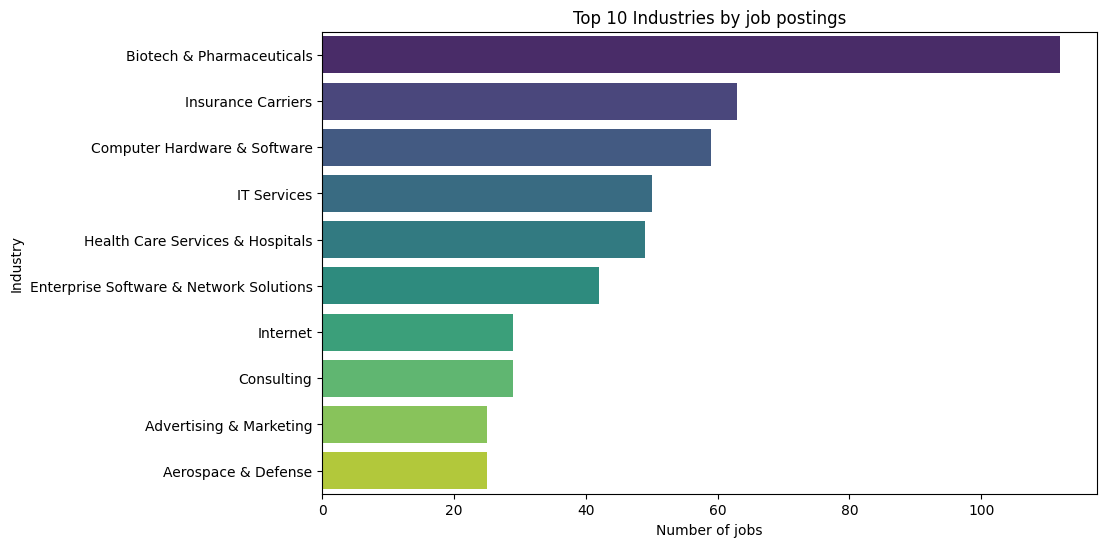

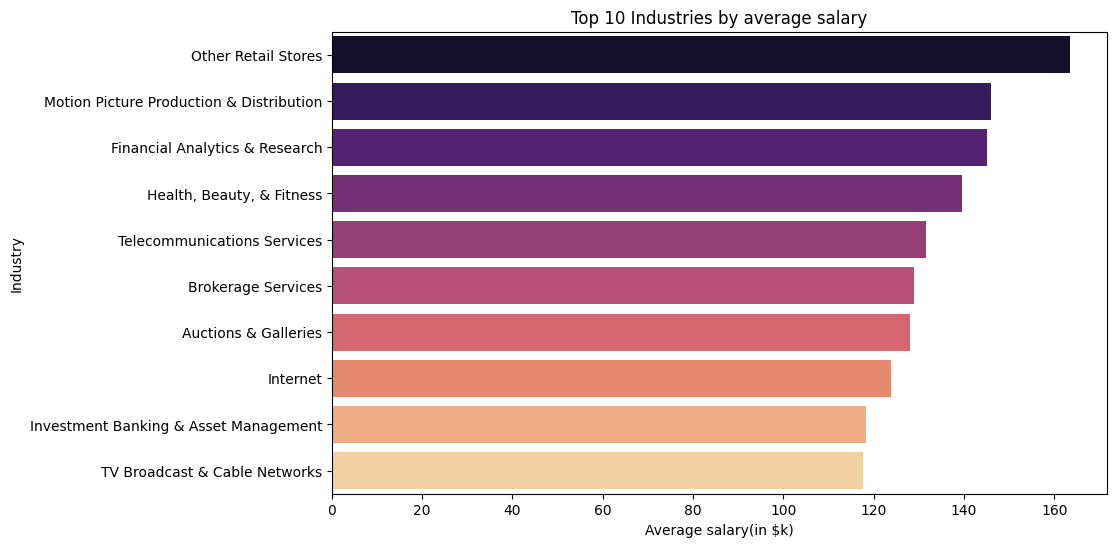

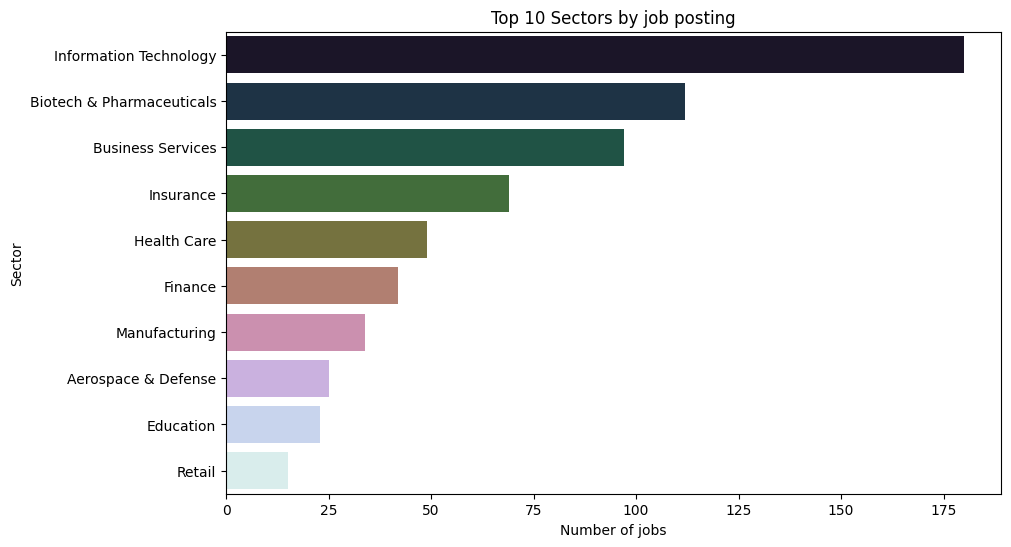

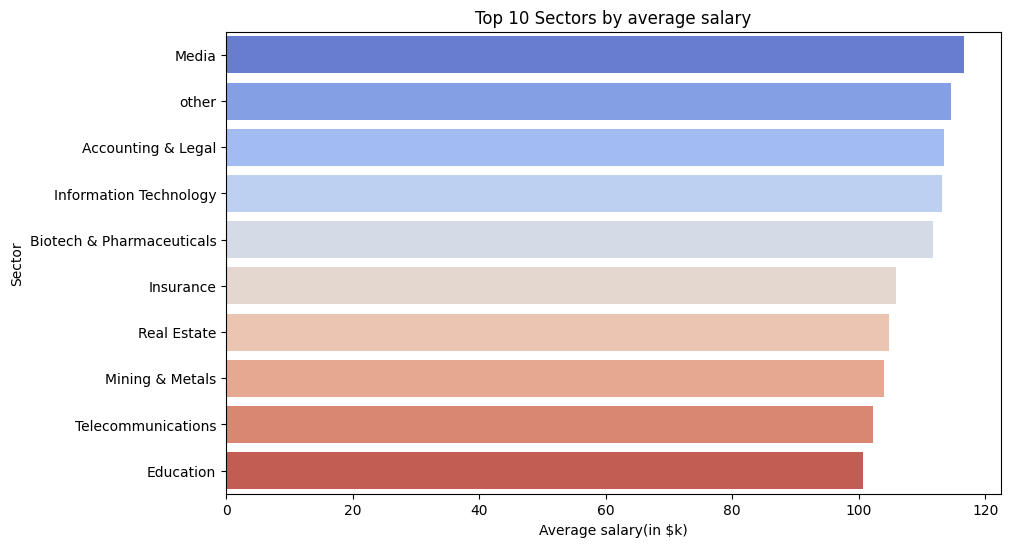

In [12]:
# Top 10 industries by number of job postings
#.value_counts() returns in decreasing order
top_industries = df['Industry'].value_counts().head(10)

# Top 10 industries by average salary
top_salary_industries = df.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False).head(10)

#Top 10 sectors by number of job postings
top_sectors = df['Sector'].value_counts().head(10)

#Top 10 sectors by average salary
# Top 10 industries by average salary
top_salary_sectors = df.groupby('Sector')['avg_salary'].mean().sort_values(ascending=False).head(10)

#visualization 1: Top Industries by job postings
plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")
plt.title("Top 10 Industries by job postings")
plt.xlabel("Number of jobs")
plt.ylabel("Industry")
plt.show()

#visualization 2: Top Industries by average salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_industries.values, y=top_salary_industries.index, palette="magma")
plt.title("Top 10 Industries by average salary")
plt.xlabel("Average salary(in $k)")
plt.ylabel("Industry")
plt.show()

#visualization 3: Top Sectors by average salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="cubehelix")
plt.title("Top 10 Sectors by job posting")
plt.xlabel("Number of jobs")
plt.ylabel("Sector")
plt.show()

#visualization 3: Top Sectors by average salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_sectors.values, y=top_salary_sectors.index, palette="coolwarm")
plt.title("Top 10 Sectors by average salary")
plt.xlabel("Average salary(in $k)")
plt.ylabel("Sector")
plt.show()

In [13]:
df_copy=df
x=df_copy.drop(columns=['Salary Estimate','min_salary','max_salary','avg_salary'])
x.head()

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [14]:
y=df['avg_salary'] #independent Feature
y.head()

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: avg_salary, dtype: float64

In [15]:
# Select categorical columns for one-hot encoding
categorical_cols = x.select_dtypes(include=['object']).columns
# Apply one-hot encoding
x_encoded = pd.get_dummies(x, columns=categorical_cols, drop_first=True)
xtrain,xtest,ytrain,ytest=train_test_split(x_encoded,y,test_size=0.2,random_state=42)
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,xtrain,ytrain,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
lin_reg.fit(xtrain,ytrain)
ypred=lin_reg.predict(xtest)

r2_score(ytest,ypred)
print(r2_score(ytest,ypred))

-358.5427675779151
0.8515934386024263


In [16]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-9,2,3,4,5,10,50,70,80,90] }

ridge_regression = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=10)
ridge_regression.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-09, 2, 3, 4, 5, 10, 50, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1e-10}
-360.30219929578544


In [18]:
ypred_ridge=ridge_regression.predict(xtest)
r2_score(ytest,ypred_ridge)
print(r2_score(ytest,ypred_ridge))

0.8515934369527881


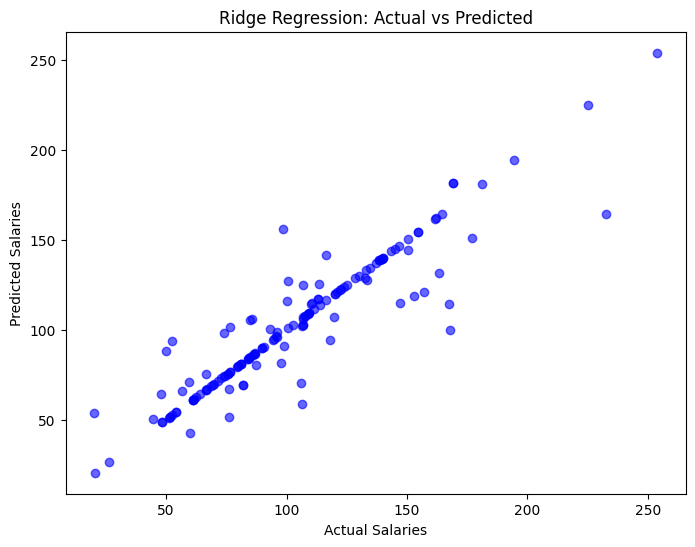

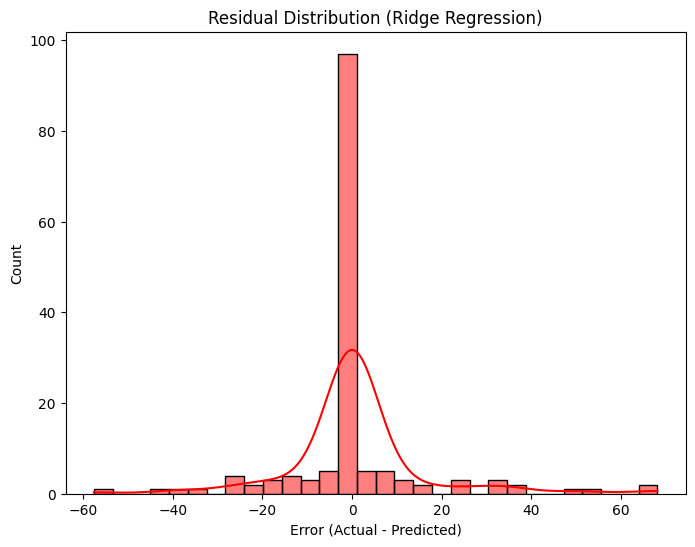

In [19]:
# 1. Actual vs Predicted Plot (for Ridge Regression)
plt.figure(figsize=(8,6))
plt.scatter(ytest, ypred_ridge, alpha=0.6, color="blue")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# 2. Residuals Distribution (Error Analysis)
residuals = ytest - ypred_ridge
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.title("Residual Distribution (Ridge Regression)")
plt.xlabel("Error (Actual - Predicted)")
plt.show()